# Lecture et Datacleaning du dataset principal

## Importation des librairies

In [1]:
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

## Grouper les unités d'enseignement UE par les compétences issues du référentiel national Bédéo Cnam

In [2]:
competences_nationales = pd.read_csv("C:/Users/amandine.gauberville/dataV2-labs/Cnam/export_unites_BDO_2021_06_04_16_36_31.csv", sep=";")

In [3]:
competences_nationales.head()

,Code,Code de suivi,Date de début de validité,Date de fin de validité,Type,Intitulé,Intitulé court,Crédits,Objectifs pédagogiques,Contenu formation,...,Description modalités de validation,Bibliographie,Modalité de déployabilité,Modalités d enseignement,Condition de déployabilité,Centres autorisés,Profil enseignant,Requête,Thésaurus Cnam,Thésaurus Formacode
0,﻿ACC110,3,01-09-2018,31-08-9999,UE,Acoustique des salles et sonorisation,Acoustique des salles et sonorisation,6,Conception et caractéristique de salles de spe...,Transducteurs pour la sonorisation\r\nRayonnem...,...,Examen final portant sur l'ensemble des connai...,J. JOUHANEAU : Acoustique des salles et sonori...,Déployable,"Formation totalement à distance, Présentiel ou...",NaN,NaN,Bac + 5 en acoustique,NaN,"A0A0A0 - Acoustique des bâtiments,A0A0A9 - Mat...",NaN
1,﻿ACC111,4,01-09-2018,31-08-9999,UE,Acoustique du bâtiment et réglementation,Acoustique du bâtiment et réglementation,6,Traitement des nuisances sonores (réduction du...,Isolement et absorption\r\nTransparence acoust...,...,Examen final portant sur l'ensemble des connai...,"S. LEWY : Acoustique industrielle (Hermès, 200...",Déployable,"Formation totalement à distance, Présentiel ou...",NaN,NaN,Bac + 5 Acoustique,NaN,"A0A0A0 - Acoustique des bâtiments,A0A0A1 - Aco...",NaN
2,﻿ACC113,2890,01-09-2012,31-08-9999,UE,Acoustique générale pour l'ingénieur,Acoustique générale pour l'ingénieur,6,Donner les connaissances nécessaires pour mesu...,\r\n1. Notions de base sur le son et les vibr...,...,Examen final portant sur l'ensemble des connai...,Serge Léwy : Acoustique industrielle et aéroac...,Déployable,Présentiel ou hybride,NaN,NaN,Les enseignants des centres régionaux assurant...,NaN,"A0A0 - Acoustique,A0A0A1 - Acoustique industri...",NaN
3,﻿ACC114,8274,18-04-2018,31-08-9999,UE,Vibroacoustique,Vibroacoustique,6,Acquisition des notions concernant la propagat...,\r\n\tÉquations fondamentales en acoustique : ...,...,Examen final portant sur l'ensemble des connai...,"A. Chaigne : Ondes acoustiques, F. Fahy : Foun...",Non déployable,"Formation totalement à distance, Présentiel ou...",NaN,NaN,Bac +5 Vibroacoustique,NaN,NaN,NaN
4,﻿ACC115,8272,01-09-2018,31-08-9999,UE,Travaux pratiques d'acoustique,Travaux pratiques d'acoustique,3,Acquérir des compétences pratiques en mesure e...,\r\n\tMesures de résonateurs acoustiques\r\n\t...,...,Contrôle de connaissances et de savoirs qui se...,NaN,Non déployable,Présentiel ou hybride,NaN,NaN,Bac + acoustique,NaN,"A0 - Acoustique,D9 - Instrumentation - Mesure,...",NaN


In [4]:
# Les index des lignes sont les codes des unités d'enseignement

competences_nationales.set_index('Code', inplace=True)

In [5]:
competences_nationales.index

Index(['﻿ACC110', '﻿ACC111', '﻿ACC113', '﻿ACC114', '﻿ACC115', '﻿ACC116',
       '﻿ACC117', '﻿ACC119', '﻿ACC120', '﻿ACC201',
       ...
       '﻿UTC504', '﻿UTC505', '﻿UTC601', '﻿UTC602', '﻿UTC603', '﻿UTC604',
       '﻿UTC701', '﻿UTC702', '﻿UTC704', '﻿UTC705'],
      dtype='object', name='Code', length=1732)

## Obtenir les unités d'enseignements ouvertes depuis 2014

In [6]:
ue_ouvertes = pd.read_csv("C:/Users/amandine.gauberville/dataV2-labs/Cnam/Requetefinale_Auditeursinscrits-UE-par-enseignant-AGauberville-2014-2020.csv", sep=";")

In [7]:
ue_ouvertes.head()

,Requête du centre régional : Auditeursinscrits-UE-par-enseignant-AGauberville,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Année,Code,ue-libellé,EPN,ECTS,ue-type-code,ue-type,inscription,Enseignant,Centre,Code-centre,enseignant_nom,enseignant_prenom
1,2014,ACC113,Acoustique générale pour l'ingénieur,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,8713,CNAM-Région Centre à Orléans,231,LANGLET,André
2,2014,ACC113,Acoustique générale pour l'ingénieur,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,16704,CNAM-Région Centre à Orléans,231,CALLÉ,Rachel
3,2014,ACC113,Acoustique générale pour l'ingénieur,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,16831,CNAM-Région Centre à Orléans,231,BERTHET,Rémy
4,2014,AER003,Mécanique des fluides élémentaire,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,8544,Centre d'enseignement à distance région centre,292,GAUTIER,Yves


In [8]:
ue_ouvertes.columns = ['année','code','ue-libellé','domaine','unité_ects','ue-type-code','ue-type','nb-inscription',
              'enseignant_code','centre','centre_code','enseignant_nom','enseignant_prenom']

In [9]:
#Supprimer la première ligne inutile

ue_ouvertes.drop(0,0,inplace=True)

In [10]:
ue_ouvertes.head()

,année,code,ue-libellé,domaine,unité_ects,ue-type-code,ue-type,nb-inscription,enseignant_code,centre,centre_code,enseignant_nom,enseignant_prenom
1,2014,ACC113,Acoustique générale pour l'ingénieur,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,8713,CNAM-Région Centre à Orléans,231,LANGLET,André
2,2014,ACC113,Acoustique générale pour l'ingénieur,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,16704,CNAM-Région Centre à Orléans,231,CALLÉ,Rachel
3,2014,ACC113,Acoustique générale pour l'ingénieur,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,16831,CNAM-Région Centre à Orléans,231,BERTHET,Rémy
4,2014,AER003,Mécanique des fluides élémentaire,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,8544,Centre d'enseignement à distance région centre,292,GAUTIER,Yves
5,2014,AER105,Mécanique des fluides industrielle,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,3,10967,CNAM-Région Centre à Orléans,231,LEROY,Annie


## Définition d'une fonction pour ajouter les compétences/mots clefs de compétences de chaque unité d'enseignement nommée UE

In [11]:
#la compréhension de liste sort les compétences en sous-liste, j'ai donc opté pour une boucle for

def ue_competences(col):
    for ue in competences_nationales.index:
        if col in ue:
            return competences_nationales.loc[ue, 'Thésaurus Cnam']

In [12]:
ue_ouvertes['competences'] = ue_ouvertes.code.apply(ue_competences)

In [16]:
ue_ouvertes.head()

,année,code,ue-libellé,domaine,unité_ects,ue-type-code,ue-type,nb-inscription,enseignant_code,centre,centre_code,enseignant_nom,enseignant_prenom,competences
1,2014,ACC113,Acoustique générale pour l'ingénieur,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,8713,CNAM-Région Centre à Orléans,231,LANGLET,André,"- Acoustique, - Acoustique industrielle, - Br..."
2,2014,ACC113,Acoustique générale pour l'ingénieur,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,16704,CNAM-Région Centre à Orléans,231,CALLÉ,Rachel,"- Acoustique, - Acoustique industrielle, - Br..."
3,2014,ACC113,Acoustique générale pour l'ingénieur,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,16831,CNAM-Région Centre à Orléans,231,BERTHET,Rémy,"- Acoustique, - Acoustique industrielle, - Br..."
4,2014,AER003,Mécanique des fluides élémentaire,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,8544,Centre d'enseignement à distance région centre,292,GAUTIER,Yves,"- Mécanique des fluides, - Cinématique des fl..."
5,2014,AER105,Mécanique des fluides industrielle,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,3,10967,CNAM-Région Centre à Orléans,231,LEROY,Annie,- Mécanique des fluidesCXA - Mécanique des fl...


## Création d'un dictionnaire pour associer un nombre d'heures à un nombre de crédit (ECTS - European Credits)

In [17]:
heures_ects = {"2":20, "3":22.5, "4":30, "6":45, "8":60, "12":90}

In [18]:
def find_volume(col):
    #return v for k,v in heures_ects.items() if col == k      c'est entre crochet
    for k,v in heures_ects.items():
        if col == k:
            return v

In [19]:
ue_ouvertes['volume-horaire'] = ue_ouvertes['unité_ects'].apply(find_volume)

In [20]:
ue_ouvertes.head()

,année,code,ue-libellé,domaine,unité_ects,ue-type-code,ue-type,nb-inscription,enseignant_code,centre,centre_code,enseignant_nom,enseignant_prenom,competences,volume-horaire
1,2014,ACC113,Acoustique générale pour l'ingénieur,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,8713,CNAM-Région Centre à Orléans,231,LANGLET,André,"- Acoustique, - Acoustique industrielle, - Br...",45.0
2,2014,ACC113,Acoustique générale pour l'ingénieur,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,16704,CNAM-Région Centre à Orléans,231,CALLÉ,Rachel,"- Acoustique, - Acoustique industrielle, - Br...",45.0
3,2014,ACC113,Acoustique générale pour l'ingénieur,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,16831,CNAM-Région Centre à Orléans,231,BERTHET,Rémy,"- Acoustique, - Acoustique industrielle, - Br...",45.0
4,2014,AER003,Mécanique des fluides élémentaire,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,8544,Centre d'enseignement à distance région centre,292,GAUTIER,Yves,"- Mécanique des fluides, - Cinématique des fl...",45.0
5,2014,AER105,Mécanique des fluides industrielle,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,3,10967,CNAM-Région Centre à Orléans,231,LEROY,Annie,- Mécanique des fluidesCXA - Mécanique des fl...,45.0


## Vérifier le types de données des colonnes 

In [21]:
ue_ouvertes.dtypes

année                 object
code                  object
ue-libellé            object
domaine               object
unité_ects            object
ue-type-code          object
ue-type               object
nb-inscription        object
enseignant_code       object
centre                object
centre_code           object
enseignant_nom        object
enseignant_prenom     object
competences           object
volume-horaire       float64
dtype: object

In [22]:
ue_ouvertes[['année', 'code', 'ue-libellé', 'domaine', 'unité_ects', 'ue-type-code','ue-type', 'nb-inscription', 'enseignant_code', 'centre', 'centre_code', 'competences', 'volume-horaire']]


,année,code,ue-libellé,domaine,unité_ects,ue-type-code,ue-type,nb-inscription,enseignant_code,centre,centre_code,competences,volume-horaire
1,2014,ACC113,Acoustique générale pour l'ingénieur,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,8713,CNAM-Région Centre à Orléans,231,"- Acoustique, - Acoustique industrielle, - Br...",45.0
2,2014,ACC113,Acoustique générale pour l'ingénieur,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,16704,CNAM-Région Centre à Orléans,231,"- Acoustique, - Acoustique industrielle, - Br...",45.0
3,2014,ACC113,Acoustique générale pour l'ingénieur,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,16831,CNAM-Région Centre à Orléans,231,"- Acoustique, - Acoustique industrielle, - Br...",45.0
4,2014,AER003,Mécanique des fluides élémentaire,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,8544,Centre d'enseignement à distance région centre,292,"- Mécanique des fluides, - Cinématique des fl...",45.0
5,2014,AER105,Mécanique des fluides industrielle,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,3,10967,CNAM-Région Centre à Orléans,231,- Mécanique des fluidesCXA - Mécanique des fl...,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7230,2020,UTC505,Introduction à la cyberstructure de l'internet...,Informatique,3,CT,Cours et Travaux pratiques,5,37222,CNAM-Région Centre Formations en alternance,411,- Réseau de télécommunicationsCAAA - Réseau d...,22.5
7231,2020,UTC601,Mathématiques 1: mathématiques générales,Mathématique et statistique,3,CO,Cours,10,19089,Centre d'enseignement à distance région centre,292,nannannan,22.5
7232,2020,UTC602,"Mathématiques 2 : probabilités, statistiques, ...",Mathématique et statistique,3,CO,Cours,7,19089,Centre d'enseignement à distance région centre,292,nannannan,22.5
7233,2020,UTC604,Mathématiques pour ingénieur,Mathématique et statistique,3,CO,Cours,9,19089,Centre d'enseignement à distance région centre,292,"- Analyse mathématique, - nombres complexes, ...",22.5


## Vérifier le nombre de valeurs nulles dans le dataframe

In [23]:
ue_ouvertes.isna().sum()

année                 0
code                  0
ue-libellé            0
domaine               0
unité_ects            0
ue-type-code         96
ue-type               0
nb-inscription        0
enseignant_code       0
centre                0
centre_code           0
enseignant_nom        0
enseignant_prenom     0
competences           0
volume-horaire        0
dtype: int64

Notre dataset contient des valeurs nulles sur le type de l'unité d'enseignement

In [24]:
#Supprimer ces valeurs nulles :

index_with_nan = ue_ouvertes.index[ue_ouvertes.isnull().any(axis=1)]
len(index_with_nan)

96

In [25]:
#Suppression des 96 enregistrements :

ue_ouvertes.drop(index_with_nan, axis=0, inplace=True)

In [26]:
#Vérification :

ue_ouvertes.isna().sum()

année                0
code                 0
ue-libellé           0
domaine              0
unité_ects           0
ue-type-code         0
ue-type              0
nb-inscription       0
enseignant_code      0
centre               0
centre_code          0
enseignant_nom       0
enseignant_prenom    0
competences          0
volume-horaire       0
dtype: int64

## Nombre d'enregistrements de notre dataset : 7138 lignes où une ligne représente une unité d'enseignement ouverte sur une année universitaire 

In [27]:
ue_ouvertes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7138 entries, 1 to 7234
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   année              7138 non-null   object 
 1   code               7138 non-null   object 
 2   ue-libellé         7138 non-null   object 
 3   domaine            7138 non-null   object 
 4   unité_ects         7138 non-null   object 
 5   ue-type-code       7138 non-null   object 
 6   ue-type            7138 non-null   object 
 7   nb-inscription     7138 non-null   object 
 8   enseignant_code    7138 non-null   object 
 9   centre             7138 non-null   object 
 10  centre_code        7138 non-null   object 
 11  enseignant_nom     7138 non-null   object 
 12  enseignant_prenom  7138 non-null   object 
 13  competences        7138 non-null   object 
 14  volume-horaire     7138 non-null   float64
dtypes: float64(1), object(14)
memory usage: 892.2+ KB


## Création d'une fonction pour analyser les compétences demandées par le Cnam national par unité d'enseignement

In [99]:
def competence_tokenizer(v):
    return list(set([w.strip() for w in re.sub('[A-Z0-9]{2,}',"",v).replace(",","").split("-") if w.strip() != ""]))

In [101]:
#Tester la fonction competence_tokenizer:

competence_tokenizer(text_data_u[700])

['Management de projet en entreprise',
 'Management des hommes',
 'Management par la qualité',
 'Management stratégique',
 "Politique d'innovation",
 "Organisation de l'entrepriseB",
 'Maîtrise des coûts',
 'Maîtrise des processus de production',
 "Direction d'entreprise",
 'Comptabilité de gestion',
 "Organisation de l'entreprise",
 'Marketing',
 'Management et stratégie',
 "Management de l'entreprise",
 'Conduite de changement en entreprise',
 'management']

In [125]:
#Voir les 3 domaines avec le plus d'unités d'enseignement ouvertes sur la période 2014-2020

ue_ouvertes['domaine'].value_counts()

Innovation                                                       1641
Droit et immobilier                                              1012
Travail, Orientation, Formation, Social                           972
Informatique                                                      691
Comptabilité Contrôle Audit (CCA)                                 576
Ingénierie mécanique et matériaux                                 561
Stratégies                                                        467
Electroniques, électrotechnique, automatique et mesure (EEAM)     466
Bâtiment et énergie                                               182
Langues                                                           153
Economie Finance Assurance Banque (EFAB)                          104
Mathématique et statistique                                        82
Santé solidarité                                                   62
Industries, chimie, pharma et agroalimentaires                     58
Territoires         

### Trouver le top 3 des compétences demandées aux enseignants selon les domaines de prédilection du Cnam CVL :

#### * Domaine Innovation :

In [130]:
data_innovation = np.array(ue_ouvertes[ue_ouvertes['domaine'] == "Innovation"].competences.values)
text_data_innov = data_innovation

In [131]:
w_freq = {}

for x in data_innovation:
    for w in competence_tokenizer(x):
        if w in w_freq:
            w_freq[w] += 1
        else:
            w_freq[w] = 1

In [132]:
w_freq_innov_df = pd.DataFrame.from_dict(w_freq, orient="index").reset_index()

In [139]:
w_freq_innov_df.sort_values(by=0, inplace=True, ascending=False)

<AxesSubplot:xlabel='0', ylabel='index'>

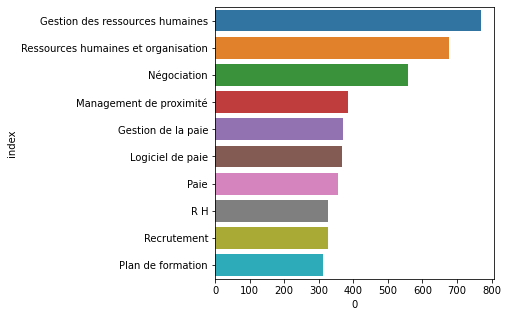

In [143]:
fig,ax = plt.subplots(figsize=(5,5))

sns.barplot(x=0, y="index", data=w_freq_innov_df.head(10))

#### * Domaine Droit et immobilier  :

In [144]:
data_droit = np.array(ue_ouvertes[ue_ouvertes['domaine'] == "Droit et immobilier"].competences.values)
text_data_droit = data_droit

In [145]:
w_freq = {}

for x in data_droit:
    for w in competence_tokenizer(x):
        if w in w_freq:
            w_freq[w] += 1
        else:
            w_freq[w] = 1

In [146]:
w_freq_droit_df = pd.DataFrame.from_dict(w_freq, orient="index").reset_index()

In [147]:
w_freq_droit_df.sort_values(by=0, inplace=True, ascending=False)

<AxesSubplot:xlabel='0', ylabel='index'>

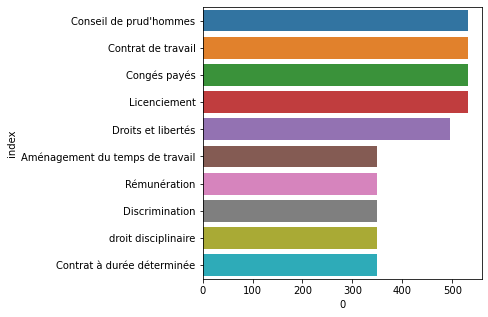

In [148]:
fig,ax = plt.subplots(figsize=(5,5))

sns.barplot(x=0, y="index", data=w_freq_droit_df.head(10))

#### * Travail, Orientation, Formation, Social  :

In [149]:
data_travail = np.array(ue_ouvertes[ue_ouvertes['domaine'] == "Travail, Orientation, Formation, Social"].competences.values)
text_data_travail = data_travail

In [150]:
w_freq = {}

for x in data_travail:
    for w in competence_tokenizer(x):
        if w in w_freq:
            w_freq[w] += 1
        else:
            w_freq[w] = 1

In [151]:
w_freq_travail_df = pd.DataFrame.from_dict(w_freq, orient="index").reset_index()

In [152]:
w_freq_travail_df.sort_values(by=0, inplace=True, ascending=False)

<AxesSubplot:xlabel='0', ylabel='index'>

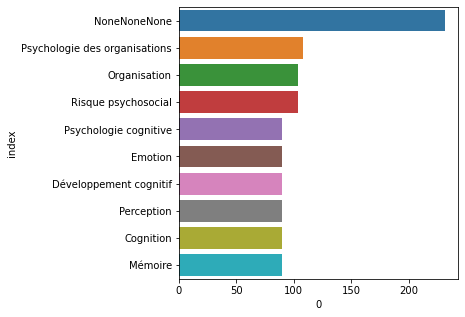

In [153]:
fig,ax = plt.subplots(figsize=(5,5))

sns.barplot(x=0, y="index", data=w_freq_travail_df.head(10))

In [39]:
ue_ouvertes['ue-type'].value_counts()

Cours                         5880
Cours et Travaux pratiques    1047
Travaux pratiques              100
Projet                          11
Stage                            3
Name: ue-type, dtype: int64

In [41]:
ue_ouvertes.groupby(["année","enseignant_code","enseignant_nom","enseignant_prenom"])["code"].count()

année  enseignant_code  enseignant_nom  enseignant_prenom
2014   10278            GAUTIER         Laurent              1
       10487            DJAMBAS         Natalie              4
       10488            SAKER           Abderrahmane         1
       10553            DYL             Christophe           2
       10628            GARENNE         Patricia             1
                                                            ..
2020   9736             BERLAND         Carine               1
       9737             PITOU           Pascal               4
       9743             FERNANDEZ       Antoine              1
       9744             PUJOL           Franck               1
       9837             ALLARD          Audrey               2
Name: code, Length: 2360, dtype: int64

## Anonymisation des données et exportation du dataset

In [46]:
ue_ouvertes.drop(["enseignant_nom", "enseignant_prenom"], axis=1, inplace=True)

In [58]:
ue_ouvertes.head()

,année,code,ue-libellé,domaine,unité_ects,ue-type-code,ue-type,nb-inscription,enseignant_code,centre,centre_code,competences,volume-horaire,co,ct,pj,st,tp,Ville
1,2014,ACC113,Acoustique générale pour l'ingénieur,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,8713,CNAM-Région Centre à Orléans,231,"- Acoustique, - Acoustique industrielle, - Br...",45.0,0.0,1.0,0.0,0.0,0.0,Orléans
2,2014,ACC113,Acoustique générale pour l'ingénieur,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,16704,CNAM-Région Centre à Orléans,231,"- Acoustique, - Acoustique industrielle, - Br...",45.0,0.0,1.0,0.0,0.0,0.0,Orléans
3,2014,ACC113,Acoustique générale pour l'ingénieur,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,16831,CNAM-Région Centre à Orléans,231,"- Acoustique, - Acoustique industrielle, - Br...",45.0,0.0,1.0,0.0,0.0,0.0,Orléans
4,2014,AER003,Mécanique des fluides élémentaire,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,8544,Centre d'enseignement à distance région centre,292,"- Mécanique des fluides, - Cinématique des fl...",45.0,0.0,1.0,0.0,0.0,0.0,None
5,2014,AER105,Mécanique des fluides industrielle,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,3,10967,CNAM-Région Centre à Orléans,231,- Mécanique des fluidesCXA - Mécanique des fl...,45.0,0.0,1.0,0.0,0.0,0.0,Orléans


## Extraction des villes pour carte de data visualisation

In [53]:
villes = ['Blois', 'Bourges', 'Chartres', 'Châteauroux', 'Orléans', 'Tours', 'Vierzon']

In [54]:
def extraire_ville(col):
    for ville in villes:
        if ville in col:
            return ville

In [55]:
ue_ouvertes['Ville'] = ue_ouvertes.centre.apply(extraire_ville)

In [56]:
ue_ouvertes.head()

,année,code,ue-libellé,domaine,unité_ects,ue-type-code,ue-type,nb-inscription,enseignant_code,centre,centre_code,competences,volume-horaire,co,ct,pj,st,tp,Ville
1,2014,ACC113,Acoustique générale pour l'ingénieur,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,8713,CNAM-Région Centre à Orléans,231,"- Acoustique, - Acoustique industrielle, - Br...",45.0,0.0,1.0,0.0,0.0,0.0,Orléans
2,2014,ACC113,Acoustique générale pour l'ingénieur,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,16704,CNAM-Région Centre à Orléans,231,"- Acoustique, - Acoustique industrielle, - Br...",45.0,0.0,1.0,0.0,0.0,0.0,Orléans
3,2014,ACC113,Acoustique générale pour l'ingénieur,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,16831,CNAM-Région Centre à Orléans,231,"- Acoustique, - Acoustique industrielle, - Br...",45.0,0.0,1.0,0.0,0.0,0.0,Orléans
4,2014,AER003,Mécanique des fluides élémentaire,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,6,8544,Centre d'enseignement à distance région centre,292,"- Mécanique des fluides, - Cinématique des fl...",45.0,0.0,1.0,0.0,0.0,0.0,None
5,2014,AER105,Mécanique des fluides industrielle,Ingénierie mécanique et matériaux,6,CT,Cours et Travaux pratiques,3,10967,CNAM-Région Centre à Orléans,231,- Mécanique des fluidesCXA - Mécanique des fl...,45.0,0.0,1.0,0.0,0.0,0.0,Orléans


## Exportation du DataFrame en csv. pour analyse des données EDA.

In [57]:
ue_ouvertes.to_csv("C:/Users/amandine.gauberville/dataV2-labs/Cnam/df_cnam.csv", index=True)